In [17]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import warnings

warnings.filterwarnings("ignore")
sp500_companies = pd.read_csv("/Users/darshan/Downloads/ecs 171 final project/sp500_companies.csv")
sp500_stocks = pd.read_csv("/Users/darshan/Downloads/ecs 171 final project/sp500_stocks.csv")
sp500_index = pd.read_csv("/Users/darshan/Downloads/ecs 171 final project/sp500_index.csv")

1) Exploratory Data Analysis

In [ ]:
%pip install plotly-express
%pip install --upgrade nbformat



In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(sp500_index['Date'], sp500_index['S&P500'], marker='o')

# Add title and labels
plt.title('S&P500 Index Value')
plt.xlabel('Date')
plt.ylabel('S&P500 Value')

# Customize x-axis with date formatting
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()



We can see a consistent upward Trend for most of its time, except in 2020 due to the pandemic

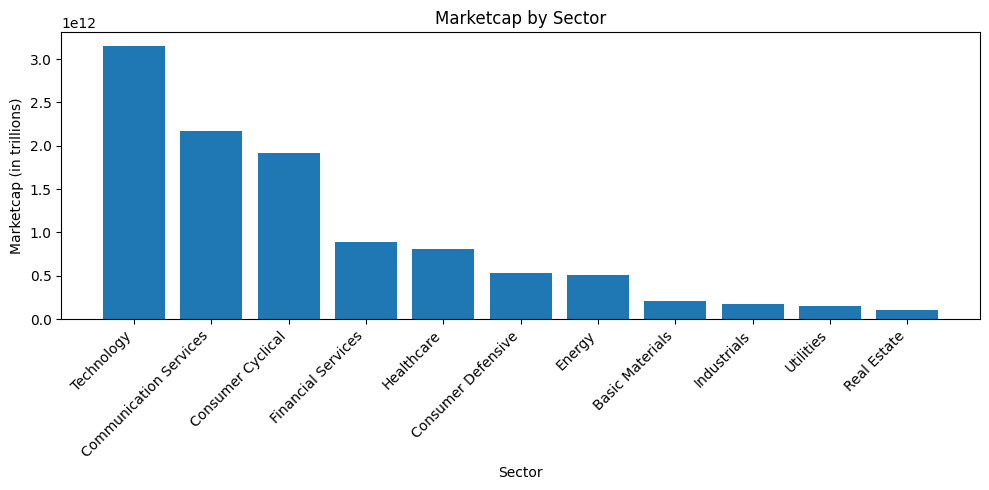

In [15]:
sp500_companies_sorted = sp500_companies.sort_values(by=["Marketcap"], ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(sp500_companies_sorted['Sector'], sp500_companies_sorted['Marketcap'])

# Add title and labels
plt.title('Marketcap by Sector')
plt.xlabel('Sector')
plt.ylabel('Marketcap (in trillions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.tight_layout()
plt.show()



The sectors with the highest market capitalization are Technology, Communication Services, and Financial Services. The sectors with the lowest market capitalization are Basic Materials, Utilities, and Real Estate.

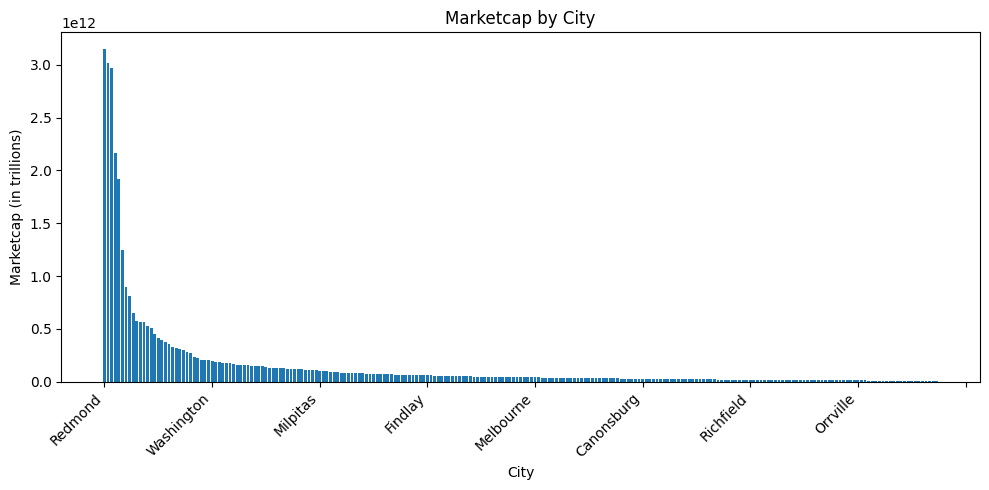

In [18]:
sp500_companies_sorted = sp500_companies.sort_values(by=["Marketcap"], ascending=False)
plt.figure(figsize=(10, 5))
plt.bar(sp500_companies_sorted['City'], sp500_companies_sorted['Marketcap'])

# Add title and labels
plt.title('Marketcap by City')
plt.xlabel('City')
plt.ylabel('Marketcap (in trillions)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))

# Display the plot
plt.tight_layout()
plt.show()

In [33]:
#sp500_companies[sp500_companies['State'].isnull()].head(3)
#sp500_companies = sp500_companies.drop(['State'], axis=1)
#sp500_companies.head(3)




We have identified State Variable has NaN values and removed it because we will be conduction Stock Analysis by Country only

<Figure size 1500x1200 with 0 Axes>

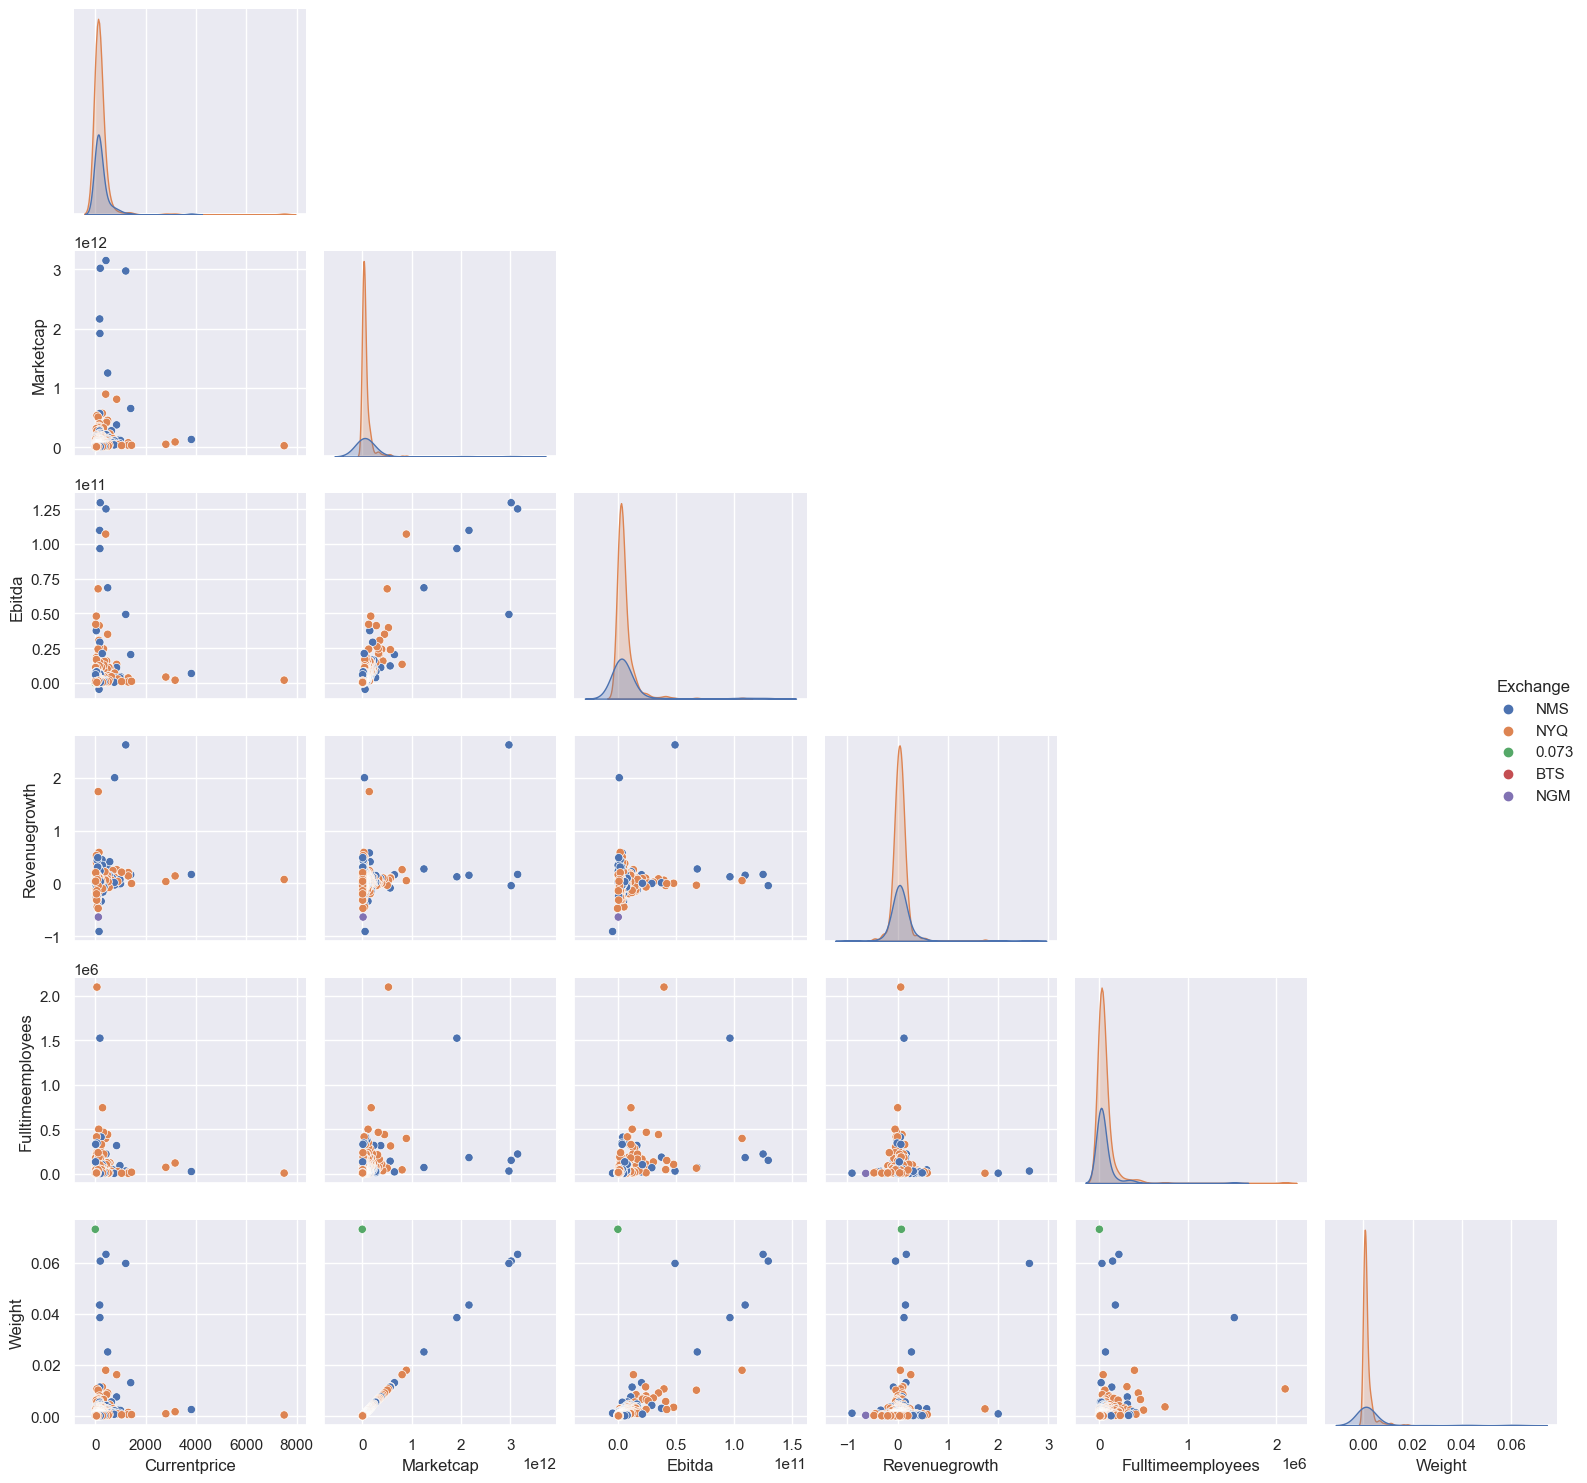

In [43]:
import seaborn as sns
sns.set(style='darkgrid')
plt.figure(figsize=(15,12))
sns.pairplot(sp500_companies, corner=True, hue='Exchange')
plt.tight_layout()


Time Series Analysis

In [1]:
%pip install statsmodels
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(sp500_stocks['Adj Close'], order=(1, 1, 1))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

forecast = model_fit.forecast(steps=30)
plt.figure(figsize=(10, 6))
plt.plot(sp500_stocks['Adj Close'], label='Historical')
plt.plot(forecast, label='Forecast', color='red')
plt.title('Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()




Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
